# Getting the dataset and evaluation baseline ready

In [1]:
import sys
sys.path.append('..')

In [2]:
import re
import csv
import nltk
import math
import string
import numpy as np
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from Chapter01.tokenization import tokenize_nltk

In [3]:
stemmer = SnowballStemmer('english')
bbc_dataset = 'bbc-text.csv'

In [4]:
def tokenize_and_stem(sentence):
    tokens = nltk.word_tokenize(sentence)
    filtered_token = [t for t in tokens if t not in string.punctuation]
    stems = [stemmer.stem(t) for t in filtered_token]
    return stems

In [5]:
stop_words = stopwords.words('english')

def get_stopwrods(stop_words):
    stemmed_stopwords = [stemmer.stem(word) for word in stop_words]
    stop_words = stop_words + stemmed_stopwords
    return stop_words

In [6]:
stop_words = get_stopwrods(stop_words)

In [7]:
def read_in_csv(csv_file):
    with open(csv_file, 'r', encoding='utf-8') as fp:
        reader = csv.reader(fp, delimiter=',', 
                            quotechar='"')
        data_read = [row for row in reader]
        return data_read

In [8]:
def get_data(filename):
    data = read_in_csv(filename)
    data_dict = {}
    for row in data[1:]:
        category = row[0]
        text = row[1]
        if category not in data_dict.keys():
            data_dict[category] = []
        data_dict[category].append(text)
    return data_dict

In [9]:
def get_stats(text, num_words=200):
    word_list = tokenize_nltk(text)
    word_list = [word for word in word_list if word not in stop_words and 
                re.search("[A-Za-z]", word)]
    freq_list = FreqDist(word_list)
    print(freq_list.most_common(num_words))
    return freq_list

In [10]:
data_dict = get_data('bbc-text.csv')

In [11]:
for topic in data_dict.keys():
    print(topic, ':', len(data_dict[topic]))

tech : 401
business : 510
sport : 511
entertainment : 386
politics : 417


In [12]:
business_data = data_dict["business"]
sports_data = data_dict["sport"]

In [13]:
business_string = ' '.join(business_data)
sports_string = ' '.join(sports_data)

In [14]:
get_stats(business_string)
get_stats(sports_string)

[('said', 1680), ('us', 813), ('year', 637), ('mr', 600), ('would', 463), ('also', 440), ('market', 425), ('new', 416), ('company', 415), ('growth', 384), ('last', 365), ('firm', 362), ('economy', 359), ('government', 340), ('bank', 335), ('sales', 316), ('could', 311), ('economic', 310), ('oil', 294), ('shares', 265), ('however', 256), ('world', 252), ('may', 251), ('years', 247), ('prices', 246), ('one', 243), ('chief', 236), ('two', 231), ('china', 223), ('business', 218), ('companies', 212), ('analysts', 209), ('uk', 207), ('deal', 206), ('rise', 203), ('expected', 200), ('group', 199), ('financial', 197), ('yukos', 196), ('firms', 193), ('since', 183), ('dollar', 180), ('december', 173), ('country', 173), ('months', 170), ('people', 170), ('stock', 168), ('first', 165), ('president', 165), ('three', 164), ('still', 164), ('many', 163), ('time', 159), ('european', 159), ('rate', 159), ('state', 158), ('trade', 158), ('told', 155), ('investment', 153), ('demand', 151), ('interest', 

FreqDist({'said': 941, 'game': 476, 'england': 459, 'first': 437, 'win': 415, 'would': 396, 'world': 379, 'last': 376, 'one': 355, 'two': 351, ...})

In [15]:
def create_vectorizer(text_list):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=20000,
                                      min_df=0.05, stop_words='english',
                                      use_idf=True,tokenizer=tokenize_and_stem,
                                      ngram_range=(1, 3))
    tfidf_vectorizer.fit_transform(text_list)
    return tfidf_vectorizer

In [16]:
def split_train_test(data, train_percentage):
    train_test_boarder = math.ceil(train_percentage * len(data))
    train_data = data[0:train_test_boarder]
    test_data = data[train_test_boarder:]
    return train_data, test_data

In [17]:
def get_labels(names):
    le = preprocessing.LabelEncoder()
    le.fit(names)
    return le
    

In [18]:
business_train_data, business_test_data = split_train_test(business_data, 0.8)
sports_train_data, sports_test_data = split_train_test(sports_data, 0.8)

In [19]:
train_data = business_train_data + sports_train_data
tfidf_vec = create_vectorizer(train_data)

/Users/bat/miniconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [20]:
le = get_labels(['business', 'sports'])

In [21]:
def create_data_matrix(input_data, vectorizer, label, le):
    vectors = vectorizer.transform(input_data).todense()
    labels = [label] * len(input_data)
    enc_labels = le.transform(labels)
    return vectors, enc_labels

In [22]:
def create_dataset(vectorizer, data_dict, le):
    business_news = data_dict['business']
    sports_news = data_dict['sports']
    
    business_vector, business_label = create_data_matrix(business_news, vectorizer,
                                                        'business', le)
    sports_vector, sports_label = create_data_matrix(sports_news, vectorizer,
                                                        'sports', le)
    
    all_data_matrix = np.vstack((business_vector, sports_vector))
    labels = np.concatenate([business_label, sports_label])
    return all_data_matrix, labels
    

In [23]:
train_data_dict = {'business':business_train_data, 
                   'sports':sports_train_data}
test_data_dict = {'business':business_test_data, 
                  'sports':sports_test_data}

In [24]:
(X_train, y_train) = create_dataset(tfidf_vec, train_data_dict, le)
(X_test, y_test) = create_dataset(tfidf_vec, test_data_dict, le)

In [25]:
def predict_trivial(X_train, y_train, X_test, y_test, le):
    dummy_clf = DummyClassifier(strategy='uniform', random_state=0)
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)
    print(dummy_clf.score(X_test, y_test))
    print(classification_report(y_test, y_pred, 
                                labels=le.transform(le.classes_),
                               target_names=le.classes_))

In [26]:
predict_trivial(X_train, y_train, X_test, y_test, le)

0.44607843137254904
              precision    recall  f1-score   support

    business       0.45      0.44      0.44       102
      sports       0.45      0.45      0.45       102

    accuracy                           0.45       204
   macro avg       0.45      0.45      0.45       204
weighted avg       0.45      0.45      0.45       204



# Performing rule-based text classification using keywords

In [27]:
import sys
sys.path.append('..')

In [28]:
import numpy as np
import string
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from itertools import repeat
from nltk.probability import FreqDist
from Chapter01.tokenization import tokenize_nltk
from Chapter04.preprocess_bbc_dataset import get_data
from Chapter04.preprocess_bbc_dataset import get_stopwords

In [29]:
business_vocabulary = ["market", "company", "growth", "firm", "economy", "government", "bank", "sales", "oil", "prices", "business", "uk", "financial", "dollar", "stock","trade", "investment", "quarter", "profit", "jobs", "foreign", "tax","euro", "budget", "cost", "money", "investor", "industry", "million", "debt"]
sports_vocabulary = ["game", "england", "win", "player", "cup", "team", "club", "match","set", "final", "coach", "season", "injury", "victory", "league", "play","champion", "olympic", "title", "ball", "sport", "race", "football", "rugby","tennis", "basketball", "hockey"]

In [30]:
business_vectorizer = CountVectorizer(vocabulary=business_vocabulary)
sports_vectorizer = CountVectorizer(vocabulary=sports_vocabulary)

In [31]:
bbc_dataset = './bbc-text.csv'
stopwords_list = get_stopwords()

In [32]:
def get_labels(labels):
    le = preprocessing.LabelEncoder()
    le.fit(labels)
    return le

le = get_labels(['business', 'sport'])

In [33]:
def create_dataset(data_dict, le):
    data_matrix = []
    classifications = []
    gold_labels = []
    for text in data_dict["business"]:
        gold_labels.append(le.transform(["business"]))
        text_vector = transform(text)
        data_matrix.append(text_vector)
    for text in data_dict["sport"]:
        gold_labels.append(le.transform(["sport"]))
        text_vector = transform(text)
        data_matrix.append(text_vector)
    X = np.array(data_matrix)
    y = np.array(gold_labels)
    return (X, y)

In [34]:
def transform(text):
    business_X = business_vectorizer.transform([text])
    sports_X = sports_vectorizer.transform([text])
    business_sum = sum(business_X.todense().tolist()[0])
    sports_sum = sum(sports_X.todense().tolist()[0])
    return np.array([business_sum, sports_sum])

In [35]:
def classify(vector, le):
    lebel = ''
    if vector[0] > vector[1]:
        label = 'business'
    else:
        label = 'sport'
    return le.transform([label])

In [36]:
def evaluate(X, y):
    y_pred = np.array(list(map(classify, X, repeat(le))))
    print(classification_report(y, y_pred, labels=le.transform(le.classes_),
                               target_names=le.classes_))

In [37]:
data_dict = get_data(bbc_dataset)
(X, y) = create_dataset(data_dict, le)
evaluate(X, y)

              precision    recall  f1-score   support

    business       1.00      0.98      0.99       510
       sport       0.98      1.00      0.99       511

    accuracy                           0.99      1021
   macro avg       0.99      0.99      0.99      1021
weighted avg       0.99      0.99      0.99      1021



### Automated process for vacubulary selection

In [38]:
data_dict = get_data(bbc_dataset)

In [39]:
from sklearn.model_selection import train_test_split
def divide_data(data_dict):
    train_dict = {}
    test_dict = {}
    for topic in data_dict.keys():
        text_list = data_dict[topic]
        x_train, x_test = train_test_split(text_list, test_size=0.2)
        train_dict[topic] = x_train
        test_dict[topic] = x_test
    return train_dict, test_dict

In [40]:
train_dict, test_dict = divide_data(data_dict)

In [41]:
le = get_labels(list(data_dict.keys()))

In [42]:
def create_vectorizers(data_dict):
    topic_list = list(data_dict.keys())
    vectorizer_dict = {}
    for topic in topic_list:
        text_array = data_dict[topic]
        text = " ".join(text_array)
        word_list = tokenize_nltk(text)
        word_list = [word for word in word_list if 
                     word not in stop_words]
        freq_dist = FreqDist(word_list)
        top_200 = freq_dist.most_common(200)
        vocab = [wtuple[0] for wtuple in top_200 if 
                 wtuple[0] not in stop_words and 
                 wtuple[0] not in string.punctuation]
        vectorizer_dict[topic] = CountVectorizer(vocabulary=vocab)
    return vectorizer_dict

In [43]:
def transform_auto(text, vect_dict, le):
    number_topics = len(list(vect_dict.keys()))
    sum_list = [0]*number_topics
    for topic in vect_dict.keys():
        vectorizer = vect_dict[topic]
        this_topic_matrix = vectorizer.transform([text])
        this_topic_sum = sum(this_topic_matrix.todense().tolist()[0])
        index = le.transform([topic])[0]
        sum_list[index] = this_topic_sum
    return np.array(sum_list)

In [44]:
def create_dataset_auto(data_dict, le, vectorizer_dict):
    data_matrix = []
    classifications = []
    gold_labels = []
    for topic in data_dict.keys():
        for text in data_dict[topic]:
            gold_labels.append(le.transform([topic]))
            text_vector = transform_auto(text, vectorizer_dict, le)
            data_matrix.append(text_vector)
    X = np.array(data_matrix)
    y = np.array(gold_labels)
    return (X, y)

In [45]:
def classify_auto(vector, le):
    result = np.where(vector == np.amax(vector))
    label = result[0][0]
    return [label]

In [46]:
def evaluate_auto(X, y, le):
    y_pred = np.array(list(map(classify_auto, X, repeat(le))))
    print(classification_report(y, y_pred, 
          labels=le.transform(le.classes_), 
          target_names=le.classes_))

In [47]:
vectorizers = create_vectorizers(train_dict)
X, y = create_dataset_auto(test_dict, le, vectorizers)
evaluate_auto(X, y, le)

               precision    recall  f1-score   support

     business       0.99      0.98      0.99       102
entertainment       0.95      0.99      0.97        78
     politics       0.96      0.96      0.96        84
        sport       0.98      0.97      0.98       103
         tech       0.96      0.95      0.96        81

     accuracy                           0.97       448
    macro avg       0.97      0.97      0.97       448
 weighted avg       0.97      0.97      0.97       448



# Clustering sentences using K-means – unsupervised text classification

In [48]:
import nltk
import re
import string
import pandas as pd
from sklearn.cluster import KMeans
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
from Chapter01.tokenization import tokenize_nltk
from Chapter01.dividing_into_sentences import divide_into_sentences_nltk
from Chapter04.preprocess_bbc_dataset import get_data
from Chapter04.keyword_classification import divide_data
from Chapter04.preprocess_bbc_dataset import get_stopwords

In [49]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

bbc_dataset = "./bbc-text.csv"
stop_words = stopwords.words('english')
stop_words = get_stopwords(stop_words)
stemmer = SnowballStemmer('english')

In [50]:
data_dict = get_data(bbc_dataset)
train_dict, test_dict = divide_data(data_dict)

In [51]:
all_training = []
all_test = []
for topic in train_dict.keys():
    all_training = all_training + train_dict[topic]
for topic in test_dict.keys():
    all_test = all_test + test_dict[topic]

In [52]:
def tokenize_and_stem(sentence):
    tokens = nltk.word_tokenize(sentence)
    filtered_tokens = [t for t in tokens if t not in 
                       stop_words and t not in 
                       string.punctuation and 
                       re.search('[a-zA-Z]', t)]
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [53]:
def create_vectorizer(data):
    vec = TfidfVectorizer(max_df=0.90, max_features=200000,
                    min_df=0.05, stop_words=stop_words,
                    use_idf=True,
                    tokenizer=tokenize_and_stem, 
                    ngram_range=(1,3))
    vec.fit(data)
    return vec

In [54]:
vectorizer = create_vectorizer(all_training)
matrix = vectorizer.transform(all_training)

/Users/bat/miniconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/bat/miniconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'could', 'might', 'must', "n't", 'need', 'r', 'sha', 'v', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [55]:
km = KMeans(n_clusters=5, init='k-means++', random_state=0)
km.fit(matrix)

KMeans(n_clusters=5, random_state=0)

In [56]:
def make_predictions(test_data, vectorizer, km):
    predicted_data = {}
    for topic in test_data.keys():
        this_topic_list = test_data[topic]
        
        if topic not in predicted_data.keys():
            predicted_data[topic] = {}
        
        for text in this_topic_list:
            prediction = km.predict(vectorizer.transform([text]))[0]
            if (prediction not in predicted_data[topic].keys()):
                predicted_data[topic][prediction] = []
            predicted_data[topic][prediction].append(text)
    return predicted_data

In [57]:
def print_report(predicted_data):
    for topic in predicted_data.keys():
        print(topic)
        for prediction in predicted_data[topic].keys():
            print("Cluster number: ", prediction, 
                  "number of items: ", 
                  len(predicted_data[topic][prediction]))

In [58]:
predicted_data = make_predictions(test_dict, vectorizer, km)
print_report(predicted_data)

tech
Cluster number:  4 number of items:  71
Cluster number:  3 number of items:  7
Cluster number:  2 number of items:  2
Cluster number:  0 number of items:  1
business
Cluster number:  2 number of items:  94
Cluster number:  4 number of items:  8
sport
Cluster number:  3 number of items:  100
Cluster number:  4 number of items:  3
entertainment
Cluster number:  0 number of items:  47
Cluster number:  4 number of items:  29
Cluster number:  3 number of items:  1
Cluster number:  2 number of items:  1
politics
Cluster number:  1 number of items:  57
Cluster number:  4 number of items:  24
Cluster number:  2 number of items:  3


In [59]:
def print_most_common_words_by_cluster(all_training, km, num_clusters):
    clusters = km.labels_.tolist()
    docs = {'text': all_training, 'cluster': clusters}
    frame = pd.DataFrame(docs, index = [clusters])
    for cluster in range(0, num_clusters):
        this_cluster_text = frame[frame['cluster'] == cluster]
        all_text = " ".join(this_cluster_text['text'].astype(str))
        top_200 = get_most_frequent_words(all_text)
        print(cluster)
        print(top_200)
    return frame

In [60]:
def get_most_frequent_words(text):
    word_list = tokenize_nltk(text)
    word_list = [word for word in word_list if word not in stop_words and word not in string.punctuation and re.search('[a-zA-Z]', word)]
    freq_dist = FreqDist(word_list)
    top_200 = freq_dist.most_common(200)
    top_200 = [word[0] for word in top_200]
    return top_200

In [61]:
print_most_common_words_by_cluster(all_training, km, 5)

0
['film', 'best', 'said', 'awards', 'also', 'year', 'award', 'films', 'director', 'us', 'one', 'actor', 'british', 'new', 'last', 'years', 'star', 'first', 'actress', 'two', 'music', 'show', 'movie', 'people', 'uk', 'prize', 'bbc', 'song', 'comedy', 'tv', 'mr', 'made', 'including', 'time', 'three', 'role', 'nominations', 'ceremony', 'top', 'stars', 'aviator', 'oscar', 'hollywood', 'festival', 'world', 'category', 'named', 'nominated', 'office', 'would', 'million', 'starring', 'well', 'oscars', 'theatre', 'took', 'box', 'london', 'drama', 'win', 'musical', 'band', 'take', 'number', 'series', 'make', 'like', 'winners', 'children', 'book', 'life', 'love', 'could', 'place', 'second', 'think', 'hit', 'screen', 'supporting', 'baby', 'five', 'include', 'academy', 'cinema', 'see', 'story', 'big', 'album', 'winner', 'man', 'play', 'producers', 'vera', 'drake', 'day', 'good', 'international', 'angels', 'told', 'great', 'set', 'golden', 'performance', 'favourite', 'dollar', 'many', 'pop', 'week'

,text,cluster
4,more power to the people says hp the digital r...,4
4,spam e-mails tempt net shoppers computer users...,4
4,spam e-mails tempt net shoppers computer users...,4
4,china ripe for media explosion asia is set t...,4
4,consumer concern over rfid tags consumers are ...,4
...,...,...
1,labour in constituency race row labour s choic...,1
1,concerns at school diploma plan final appeals ...,1
1,ukip candidate suspended in probe eurosceptic ...,1
4,england children s tsar appointed the first ch...,4


In [62]:
import pickle
pickle.dump(km, open('bbc_kmeans.pkl', 'wb'))

In [63]:
km = pickle.load(open("bbc_kmeans.pkl", 'rb'))

# Using SVMs for supervised text classification

In [98]:
import numpy as np
import pandas as pd
import pickle
import string
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
import sys
sys.path.append('..')

In [100]:
from Chapter01.tokenization import tokenize_nltk
from Chapter04.preprocess_bbc_dataset import get_data
from Chapter04.keyword_classification import get_labels
from Chapter04.preprocess_bbc_dataset import get_stopwords

In [101]:
stop_words = stopwords.words('english')
stop_words = get_stopwords(stop_words)

In [102]:
bbc_dataset = 'bbc-text.csv'

In [103]:
data_dit = get_data(bbc_dataset)
le = get_labels(list(data_dict.keys()))

In [104]:
def create_dataset(data_dict, le):
    text = []
    labels = []
    for topic in data_dict:
        label = le.transform([topic])
        text = text + data_dict[topic]
        this_topic_labels = \
        [label[0]]*len(data_dict[topic])
        labels = labels + this_topic_labels
    docs = {'text':text, 'label':labels}
    frame = pd.DataFrame(docs)
    return frame 

In [105]:
def split_dataset(df, train_column_name,gold_column_name, test_percent):
    X_train, X_test, y_train, y_test = train_test_split(df[train_column_name], df[gold_column_name], test_size=test_percent, random_state=0)
    return X_train, X_test, y_train, y_test

In [106]:
def create_and_fit_vectorizer(training_text):
    vec = TfidfVectorizer(max_df=0.90, min_df=0.05, 
                          stop_words=stop_words, use_idf=True,
                          tokenizer=tokenize_and_stem, 
                          ngram_range=(1,3))
    return vec.fit(training_text)

In [107]:
df = create_dataset(data_dict, le)
X_train, X_test, y_train, y_test = split_dataset(df, 'text', 'label', 20)
vectorizer = create_and_fit_vectorizer(X_train)
X_train = vectorizer.transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()

/Users/bat/miniconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/bat/miniconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'could', 'might', 'must', "n't", 'need', 'r', 'sha', 'v', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [108]:
def train_svm_classifier(X_train, y_train):
    clf = SVC(C=1, kernel='linear', decision_function_shape='ovo')
    clf.fit(X_train, y_train)
    return clf

In [109]:
def evaluate(clf, X_test, y_test, le):
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred, labels=le.transform(le.classes_),
                               target_names=le.classes_))

In [110]:
clf = train_svm_classifier(X_train, y_train)
pickle.dump(clf, open('bbc_svm.pkl','wb'))
evaluate(clf, X_test, y_test, le)

               precision    recall  f1-score   support

     business       1.00      1.00      1.00         2
entertainment       1.00      1.00      1.00         2
     politics       1.00      1.00      1.00         4
        sport       1.00      1.00      1.00        10
         tech       1.00      1.00      1.00         2

     accuracy                           1.00        20
    macro avg       1.00      1.00      1.00        20
 weighted avg       1.00      1.00      1.00        20



In [111]:
def test_new(input_string, clf, vectorizer, le):
    vector = vectorizer.transform([input_string]).todense()
    prediction = clf.predict(vector)
    print(prediction)
    label = le.inverse_transform(prediction)
    print(label)

In [112]:
new_example = """iPhone 12: Apple makes jump to 5G
Apple has confirmed its iPhone 12 handsets will be its first to work on faster 5G networks. 
The company has also extended the range to include a new "Mini" model that has a smaller 5.4in screen. 
The US firm bucked a wider industry downturn by increasing its handset sales over the past year. 
But some experts say the new features give Apple its best opportunity for growth since 2014, when it revamped its line-up with the iPhone 6. 
"5G will bring a new level of performance for downloads and uploads, higher quality video streaming, more responsive gaming, real-time interactivity and so much more," said chief executive Tim Cook. 
…"""
test_new(new_example, clf, vectorizer, le)

[0]
['business']


# Using LSTMs for supervised text classification

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

In [2]:
import sys
sys.path.append('..')

In [3]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pickle
from Chapter04.preprocess_bbc_dataset import get_data
from Chapter04.keyword_classification import get_labels
from Chapter04.preprocess_bbc_dataset import get_stopwords

In [4]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) 
tf.autograph.set_verbosity(1)

In [5]:
def create_dataset(data_dict, le):
    text = []
    labels = []
    for topic in data_dict:
        label = le.transform([topic])
        text = text + data_dict[topic]
        this_topic_labels = \
        [label[0]]*len(data_dict[topic])
        labels = labels + this_topic_labels
    docs = {'text':text, 'label':labels}
    frame = pd.DataFrame(docs)
    return frame 

In [6]:
new_example = """iPhone 12: Apple makes jump to 5G
Apple has confirmed its iPhone 12 handsets will be its first to work on faster 5G networks. 
The company has also extended the range to include a new "Mini" model that has a smaller 5.4in screen. 
The US firm bucked a wider industry downturn by increasing its handset sales over the past year. 
But some experts say the new features give Apple its best opportunity for growth since 2014, when it revamped its line-up with the iPhone 6. 
"5G will bring a new level of performance for downloads and uploads, higher quality video streaming, more responsive gaming, 
real-time interactivity and so much more," said chief executive Tim Cook. 
There has also been a cosmetic refresh this time round, with the sides of the devices getting sharper, flatter edges. 
The higher-end iPhone 12 Pro models also get bigger screens than before and a new sensor to help with low-light photography. 
However, for the first time none of the devices will be bundled with headphones or a charger. 
Apple said the move was to help reduce its impact on the environment. "Tim Cook [has] the stage set for a super-cycle 5G product release," 
commented Dan Ives, an analyst at Wedbush Securities. 
He added that about 40% of the 950 million iPhones in use had not been upgraded in at least three-and-a-half years, presenting a "once-in-a-decade" opportunity. 
In theory, the Mini could dent Apple's earnings by encouraging the public to buy a product on which it makes a smaller profit than the other phones. 
But one expert thought that unlikely. 
"Apple successfully launched the iPhone SE in April by introducing it at a lower price point without cannibalising sales of the iPhone 11 series," noted Marta Pinto from IDC. 
"There are customers out there who want a smaller, cheaper phone, so this is a proven formula that takes into account market trends." 
The iPhone is already the bestselling smartphone brand in the UK and the second-most popular in the world in terms of market share. 
If forecasts of pent up demand are correct, it could prompt a battle between network operators, as customers become more likely to switch. 
"Networks are going to have to offer eye-wateringly attractive deals, and the way they're going to do that is on great tariffs and attractive trade-in deals," 
predicted Ben Wood from the consultancy CCS Insight. Apple typically unveils its new iPhones in September, but opted for a later date this year. 
It has not said why, but it was widely speculated to be related to disruption caused by the coronavirus pandemic. The firm's shares ended the day 2.7% lower. 
This has been linked to reports that several Chinese internet platforms opted not to carry the livestream, 
although it was still widely viewed and commented on via the social media network Sina Weibo."""

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words = get_stopwords(stop_words)

In [8]:
MAX_NUM_WORDS = 50000
MAX_SEQUENCE_LENGTH = 1000
EMBEDDING_DIM = 300
bbc_dataset = "bbc-text.csv"

In [9]:
def create_tokenizer(input_data, save_path):
    tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                         lower=True)
    tokenizer.fit_on_texts(input_data)
    save_tokenizer(tokenizer, save_path)
    return tokenizer

In [10]:
def save_tokenizer(tokenizer, filename):
    with open(filename, 'wb') as f:
        pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

def load_tokenizer(filename):
    with open(filename, 'rb') as f:
        tokenizer = pickle.load(f)
    return tokenizer

In [11]:
def plot_history(history):
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

In [12]:
def evaluate(model, X_test, y_test, le):
    y_prob = model.predict(X_test)
    y_pred = y_prob.argmax(axis=-1)
    y_test = y_test.argmax(axis=-1)
    y_new_pred = [le.inverse_transform([value]) for 
                  value in y_pred]
    y_new_test = [le.inverse_transform([value]) for 
                  value in y_test]
    print(classification_report(y_new_test, 
                                y_new_pred))

In [13]:
def transform_text(tokenizer, input_text):
    if (isinstance(tokenizer, str)):
        tokenizer = load_tokenizer(tokenizer)
    X_input = tokenizer.texts_to_sequences(input_text)
    X_input = pad_sequences(X_input, maxlen=MAX_SEQUENCE_LENGTH)
    return X_input

In [14]:
def train_model(df, le):
    tokenizer = create_tokenizer(df['text'].values,
                                'bbc_tokenizer.pickle')
    
    X = transform_text(tokenizer, df['text'].values)
    y = pd.get_dummies(df['label']).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = 0.20,
                                                        random_state = 42)
    
    model = Sequential()
    optimizer = tf.keras.optimizers.Adam(0.0001)
    model.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(5, activation='softmax'))
    
    loss = 'categorical_crossentropy'
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    
    epochs = 7
    batch_size = 64
    es = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
    history = model.fit(X_train, y_train,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_split=0.2,
                       callbacks=[es])
    
    accr = model.evaluate(X_test, y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: \
           {:0.3f}'.format(accr[0],accr[1]))
    model.save('bbc_model_s1.h5')
    evaluate(model, X_test, y_test, le)
    plot_history(history)

In [15]:
data_dict = get_data(bbc_dataset)
le = get_labels(list(data_dict.keys()))
df = create_dataset(data_dict, le)

Epoch 1/7
23/23 [==============================] - 107s 4s/step - loss: 1.6078 - accuracy: 0.2296 - val_loss: 1.6059 - val_accuracy: 0.2472
Epoch 2/7
23/23 [==============================] - 105s 5s/step - loss: 1.6002 - accuracy: 0.3350 - val_loss: 1.6028 - val_accuracy: 0.2725
Epoch 3/7
23/23 [==============================] - 103s 4s/step - loss: 1.5923 - accuracy: 0.3722 - val_loss: 1.5990 - val_accuracy: 0.2921
Epoch 4/7
23/23 [==============================] - 101s 4s/step - loss: 1.5823 - accuracy: 0.4052 - val_loss: 1.5932 - val_accuracy: 0.3202
Epoch 5/7
23/23 [==============================] - 102s 4s/step - loss: 1.5656 - accuracy: 0.4136 - val_loss: 1.5820 - val_accuracy: 0.3287
Epoch 6/7
23/23 [==============================] - 102s 4s/step - loss: 1.5069 - accuracy: 0.3926 - val_loss: 1.4602 - val_accuracy: 0.3933
Epoch 7/7
14/14 [==============================] - 5s 384ms/step - loss: 1.3254 - accuracy: 0.4067
Test set
  Loss: 1.325
  Accuracy:            0.407


/Users/bat/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bat/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bat/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

     business       0.63      0.81      0.71       104
entertainment       0.00      0.00      0.00        75
     politics       1.00      0.01      0.02        82
        sport       0.30      0.95      0.46        99
         tech       1.00      0.02      0.05        85

     accuracy                           0.41       445
    macro avg       0.59      0.36      0.25       445
 weighted avg       0.59      0.41      0.28       445



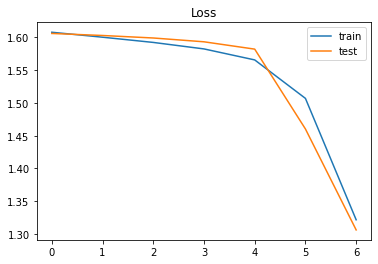

In [16]:
train_model(df, le)

In [17]:
def load_and_evaluate_model(model_path, tokenizer_path, df, le):
    model = load_model(model_path)
    tokenizer = load_tokenizer(tokenizer_path)
    X = transform_text(tokenizer, df['text'].values)
    y = pd.get_dummies(df['label']).values
    evaluate(model, X, y, le)

In [23]:
def test_new_example(model, tokenizer, le, text_input):
    X_example = transform_text(tokenizer, [new_example])
    label_array = model.predict(X_example)
    new_label = np.argmax(label_array, axis=-1)
    print(new_label)
    print(le.inverse_transform(new_label))

In [24]:
model_path = 'bbc_model_s1.h5'
tokenizer_path = 'bbc_tokenizer.pickle'

In [25]:
tokenizer = load_tokenizer(tokenizer_path)
model = load_model(model_path)

In [26]:
test_new_example(model, tokenizer, le, new_example)

[0]
['business']
